In [11]:
from __future__ import print_function
from __future__ import absolute_import
import sys
import os
import scipy


import numpy as np
import matplotlib.pyplot as plt
import time
import camb
from camb import get_matter_power_interpolator, model
from scipy import special
import importlib


#our modules
import remote_spectra as remote_spectra
import halomodel as hm
import CIB_halomodel as CIB

import CIB_data as data


Initiate a halo model:

In [2]:
halomodel = hm.HaloModel()

zs = np.logspace(np.log10(0.01),np.log10(10),60) 

halomodel._setup_k_z_m_grid_functions(zs,need_ukm=False)


Note: redshifts have been re-sorted (earliest first)
starting redshift loop
done in 36.493199825286865 seconds


Get the linear power spectrum from CAMB:

In [3]:
Plin=camb.get_matter_power_interpolator(halomodel.cambpars, nonlinear=False,hubble_units=False, k_hunit=False, kmax=halomodel.k[-1], zmax=1100)


Initiate a CIB model:

In [7]:
frequencies=np.array([217,353,545,857,3000])  #Planck frequencies
alpha_fiducial=0.36
T0_fiducial=24.4
beta_fiducial=1.75
gamma_fiducial=1.7
delta_fiducial=3.6
Meff_fiducial=12.6
L0_fiducial=np.sqrt(1.551285938046646e-112)*np.sqrt(0.6642169196484612)*np.sqrt(1.5)
logmmin=10
sigmamsq=0.5
zplateau=zs[-1]+1
    
    
parameters=[alpha_fiducial,T0_fiducial,beta_fiducial,gamma_fiducial,delta_fiducial,Meff_fiducial,L0_fiducial,logmmin,sigmamsq,zplateau]


In [8]:

cib=CIB.CIB_fluxes(halomodel,parameters,frequencies,experiment="Planck")

cib.setup_fluxes()



In [9]:
ells=np.logspace(2,np.log10(2500),20)

cib.compute_auto_cls(ells,Plin.P)
cib.compute_lensing_cib_cls(ells,Plin.P)

now let's plot the model and the data power spectrum

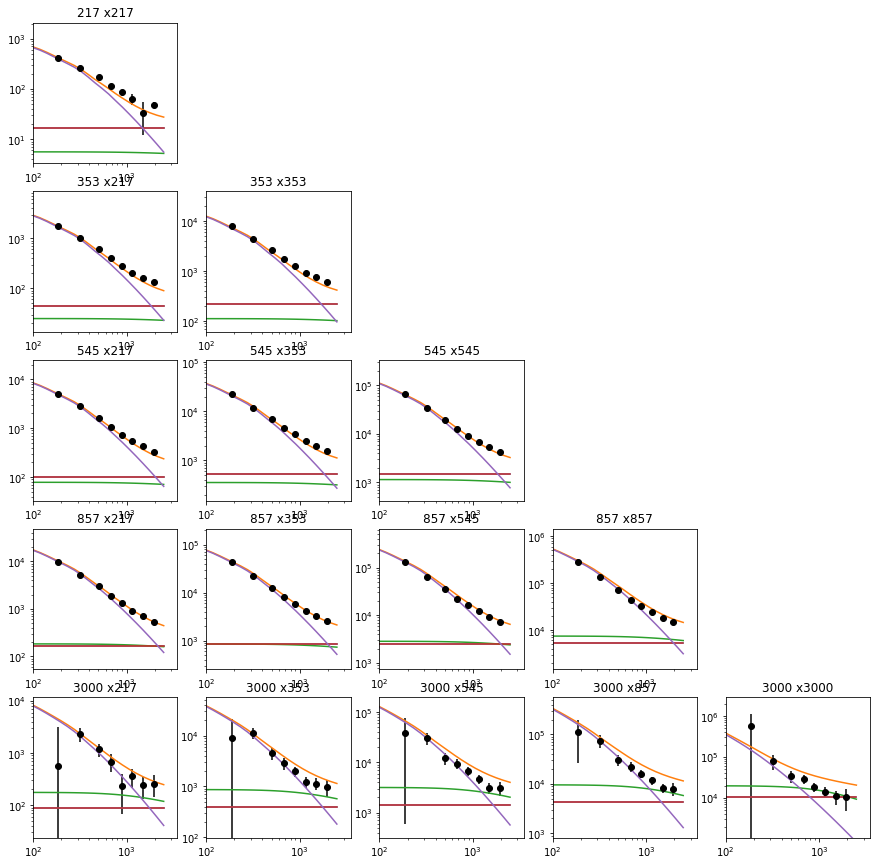

In [14]:
plt.figure(figsize=(15,15))

itera=1
for x in range(0,5):
    for y in range(0,5):
        if x>=y:
            plt.subplot(5,5, itera)
            plt.title(str(frequencies[x])+' x' +str(frequencies[y]))
            plt.loglog(ells,np.ones(len(ells))*CIB.sn(frequencies[x],frequencies[y]))
            plt.loglog(ells,CIB.correction(frequencies[x])*CIB.correction(frequencies[y])*cib.auto_Cls[x,y]+CIB.sn(frequencies[x],frequencies[y]))
            plt.loglog(ells,CIB.correction(frequencies[x])*CIB.correction(frequencies[y])*cib.Cls_1halo[x,y])
            plt.loglog(ells,np.ones(len(ells))*CIB.sn(frequencies[x],frequencies[y]))
            plt.loglog(ells,CIB.correction(frequencies[x])*CIB.correction(frequencies[y])*cib.Cls_2halo[x,y])


            plt.loglog(data.Planck_ls[2:-1],data.Planck_cls[x,y],'o',color='black')
            plt.errorbar(data.Planck_ls[2:-1],data.Planck_cls[x,y],yerr=data.yerror[x,y],fmt='none', ecolor='black')
            plt.xlim(100,3500)
            
            ymax=np.max(data.Planck_cls[x,y]*5)
            
            ymin=np.min(data.Planck_cls[x,y]*1/10)
            
            plt.ylim(ymin,ymax)
        itera=itera+1

plt.show()
